## Initial Analysis for new loss funcion

##### Contents of analysis
- Compare loss curve with various settings 
- Apply clustering
   - normal MNIST test data
   - rotated MNIST test data
- Train latent representation with Train data and Test accuracy

##### Dataset
- MNIST

In [1]:
import os
import sys
import glob
import random
import statistics
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from pylab import *
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

In [2]:
### F score metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as prf_support
from sklearn.metrics import f1_score

In [3]:
def compute_tsne(data,n_components=2):
    features = TSNE(n_components=n_components, random_state=0).fit_transform(data)
    return features

In [4]:
def compute_aggl(data, n_cluster=10):
    method = AgglomerativeClustering(n_clusters=n_cluster)
    labels = method.fit_predict(data)
    return labels

In [5]:
def get_rand_colors(n=10, cmap_name='jet', _seed = 654321):
    cmap = cm.get_cmap(cmap_name, n)
    colors = []
    for idx, i in enumerate(range(cmap.N)):
        rgb = cmap(i)[:3]
        colors += [matplotlib.colors.rgb2hex(rgb)]
        # shuffle
        seed(_seed)
        shuffle(colors)
    return colors

MNIST Data if necessay

In [15]:
from tensorflow.examples.tutorials.mnist import input_data

### Loss comparison

In [140]:
logdir = "/home/tkurihana/scratch-midway2/clouds/metrics/log"
loss_36_list = glob.glob(logdir+'/loss_new_nepoch-36*.txt')
loss_36_list.sort()

In [8]:
loss_30_list

['/home/tkurihana/scratch-midway2/clouds/metrics/log/loss_nepoch-30_lr-0.001_nbatch-128_lambda1.0_dangle2.txt',
 '/home/tkurihana/scratch-midway2/clouds/metrics/log/loss_nepoch-30_lr-0.001_nbatch-32_lambda1.0_dangle2.txt',
 '/home/tkurihana/scratch-midway2/clouds/metrics/log/loss_nepoch-30_lr-0.01_nbatch-128_lambda1.0_dangle2.txt',
 '/home/tkurihana/scratch-midway2/clouds/metrics/log/loss_nepoch-30_lr-0.01_nbatch-32_lambda1.0_dangle2.txt']

In [15]:
def load_txt(ifile):
    data = []
    with open(ifile, 'r') as f:
        for line in f.readlines():
            data.append(float(line.split("\n")[0]))
    return data

In [19]:
loss_curve_list = []
for ifile in loss_30_list:
    loss_curve_list.append(load_txt(ifile))
loss_array = np.asarray(loss_curve_list)

Plot: fix the following variables $\lambda = 1.0$, $dangle = 2$

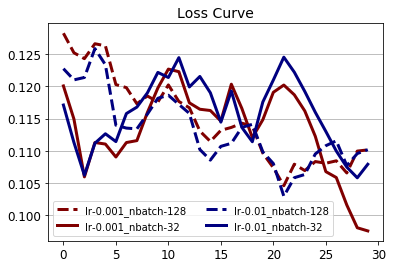

In [29]:
name_list = [
    "lr-0.001_nbatch-128",
    "lr-0.001_nbatch-32",
    "lr-0.01_nbatch-128",
    "lr-0.01_nbatch-32",
]
ls_list = [
    '--', '-', '--','-'
]

colors = get_rand_colors(n=2)

plt.figure()
x = np.array([ i for i in range(loss_array[0].shape[0])])
ic = 0
for idx, loss in enumerate(loss_array):
    if idx >= 2:
        ic = 1
    plt.plot(x, loss, color=colors[ic], linestyle=ls_list[idx], linewidth=3, label=name_list[idx] )
plt.title("Loss Curve", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().yaxis.grid()
plt.legend(ncol=2)
plt.show()

-------------
Plot:   
Change the following variables $\lambda = {0.1, 0.5, 1.0}$,   
But fix $dangle = 2$, $learning rate = 0.001$ and $batch = 32$

In [143]:
loss_36_list = glob.glob(logdir+'/loss_new_nepoch-36*.txt')
loss_36_list.sort(reverse=True)

In [144]:
loss_36_list

['/home/tkurihana/scratch-midway2/clouds/metrics/log/loss_new_nepoch-36_lr-0.001_nbatch-32_lambda1.0_dangle2.txt',
 '/home/tkurihana/scratch-midway2/clouds/metrics/log/loss_new_nepoch-36_lr-0.001_nbatch-32_lambda0.5_dangle2.txt',
 '/home/tkurihana/scratch-midway2/clouds/metrics/log/loss_new_nepoch-36_lr-0.001_nbatch-32_lambda0.1_dangle2.txt']

In [34]:
loss_filelist = loss_31_list + [loss_30_list[1]]

In [35]:
loss_filelist

['/home/tkurihana/scratch-midway2/clouds/metrics/log/loss_nepoch-31_lr-0.001_nbatch-32_lambda0.1_dangle2.txt',
 '/home/tkurihana/scratch-midway2/clouds/metrics/log/loss_nepoch-31_lr-0.001_nbatch-32_lambda0.5_dangle2.txt',
 '/home/tkurihana/scratch-midway2/clouds/metrics/log/loss_nepoch-30_lr-0.001_nbatch-32_lambda1.0_dangle2.txt']

In [145]:
loss_curve_list = []
for ifile in loss_36_list:
    loss_curve_list.append(load_txt(ifile))
loss_array = np.asarray(loss_curve_list)

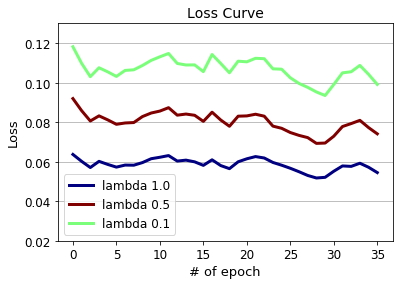

In [150]:
name_list = [
    "lambda 1.0",
    "lambda 0.5",
    "lambda 0.1",
]

colors = get_rand_colors(n=3)

plt.figure()
for idx, loss in enumerate(loss_array[::-1]):
    x = np.array([ i for i in range(len(loss))])
    plt.plot(x, loss, color=colors[idx],  linewidth=3, label=name_list[idx] )
plt.title("Loss Curve", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0.02,0.13)
plt.ylabel("Loss", fontsize=13)
plt.xlabel("# of epoch", fontsize=13)
plt.gca().yaxis.grid()
plt.legend(ncol=1, loc='lower left', fontsize=12)
plt.show()

Compare with original L2 model

In [154]:
ofile = glob.glob(logdir+'/loss_original*.txt')

In [162]:
loss_comp_list = [loss_36_list[-1]]+ ofile 

In [163]:
loss_comp_list

['/home/tkurihana/scratch-midway2/clouds/metrics/log/loss_new_nepoch-36_lr-0.001_nbatch-32_lambda0.1_dangle2.txt',
 '/home/tkurihana/scratch-midway2/clouds/metrics/log/loss_original_nepoch-6_lr-0.0001_nbatch-32.txt']

In [164]:
loss_curve_list = []
for ifile in loss_comp_list:
    loss_curve_list.append(load_txt(ifile))
loss_array = np.asarray(loss_curve_list)

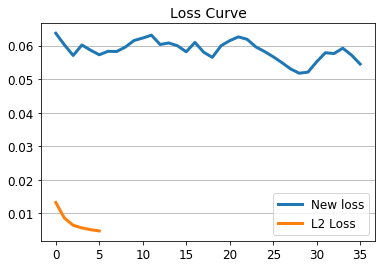

In [165]:
name_list = [
     "New loss",
     "L2 Loss"
]

#colors = get_rand_colors(n=2)

plt.figure()
for idx, loss in enumerate(loss_array):
    x = np.array([ i for i in range(len(loss))])
    plt.plot(x, loss, linewidth=3, label=name_list[idx] )
plt.title("Loss Curve", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.ylim(0.02,0.13)
plt.gca().yaxis.grid()
plt.legend(ncol=1, loc='lower right', fontsize=12)
plt.show()

-------------------------------
### Clustering  

Load data

In [70]:
### load mnist data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(os.path.abspath("./MNIST_data/"), one_hot=False)

Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/train-images-idx3-ubyte.gz
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/t10k-labels-idx1-ubyte.gz


In [83]:
# data
x_test = mnist.test.images
n = x_test.shape[0]
x_test = x_test.reshape(n, 28,28,1)

# labels
y_test = mnist.test.labels

Load model

In [76]:
def load_model(model_dir='.', step=30):
    encoder_def = model_dir+'/encoder.json'
    encoder_weight = model_dir+'/encoder-'+str(step)+'.h5'
    with open(encoder_def, "r") as f:
        encoder = tf.keras.models.model_from_json(f.read())
    encoder.load_weights(encoder_weight)
    return encoder

In [151]:
new_model = load_model('./output_model/61881099', step=5) 

In [152]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoding_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
re_lu (ReLU)                 (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 10)        1450      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 14, 14, 10)        0         
__________

In [166]:
omodel = load_model('./output_model/original2', step=5)  # original model
nmodel = load_model('./output_model/61881099', step=35) # new l2 loss modle

In [86]:
omodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoding_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
re_lu (ReLU)                 (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 14, 14, 8)         0         
__________

In [84]:
olatents = omodel.predict(x_test)
nlatents = nmodel.predict(x_test)

In [90]:
olabels = compute_aggl( np.mean(olatents, axis=(1,2)), n_cluster=10)
nlabels = compute_aggl( np.mean(nlatents, axis=(1,2)), n_cluster=10)

###### Plot with tsne

- original model

In [ ]:
features = compute_tsne(np.mean(olatents, axis=(1,2)), n_components=2)

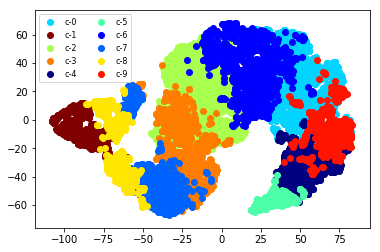

In [118]:
colors = get_rand_colors(n=10, _seed=102)                        
for icluster in range(10):
    idx = np.argwhere(olabels == icluster)
    plt.scatter(features[idx, 0], features[idx, 1], color=colors[icluster], label='c-'+str(icluster))
plt.legend(ncol=2 ,fontsize=8)
plt.show()

- new loss

In [110]:
nfeatures = compute_tsne(np.mean(nlatents, axis=(1,2)), n_components=2)

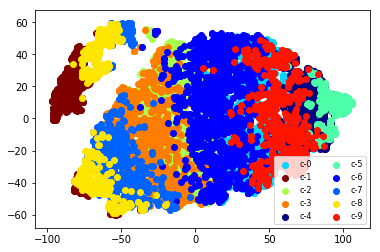

In [119]:
colors = get_rand_colors(n=10, _seed=102)                        
for icluster in range(10):
    idx = np.argwhere(olabels == icluster)
    plt.scatter(nfeatures[idx, 0], nfeatures[idx, 1], color=colors[icluster], label='c-'+str(icluster))
plt.legend(ncol=2 ,fontsize=8)
plt.show()

-------------
#### Distribution of each cluster

###### clustering scores (additionally)
- Accuracy
- Precision
- Recall
- F1

 Original model

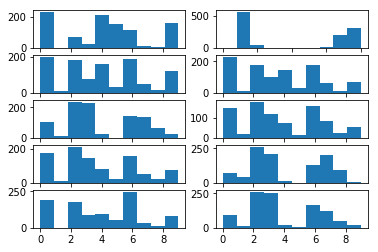

In [136]:
fig = plt.figure()
for icluster in range(10):
    ax = plt.subplot(5,2,icluster+1)
    true_idx = np.where(y_test == icluster)
    plt.hist(olabels[true_idx])

New L2 model

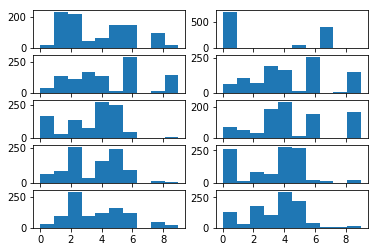

In [137]:
fig = plt.figure()
for icluster in range(10):
    ax = plt.subplot(5,2,icluster+1)
    true_idx = np.where(y_test == icluster)
    plt.hist(nlabels[true_idx])

-------------------
### Supervised training with latent space
Build simple classifier (Conv+CNN) which inputs rotated MNIST data and outputs the 10-classes. Which model can dicriminate rotated image more accurately?

##### Goal
Latent representation learing randomly rotated images can prevent degradation of performance? If so performance is fine? 

In [6]:
# additional functions for this analysis
from classifier import rotate_fn
from classifier_2 import input_fn

###### Common Functions

In [7]:
def load_cnn(model_dir='.', step=30):
    cnn_def = model_dir+'/cnn.json'
    cnn_weight = model_dir+'/cnn-'+str(step)+'.h5'
    with open(cnn_def, "r") as f:
        cnn = tf.keras.models.model_from_json(f.read())
    cnn.load_weights(cnn_weight)
    return cnn

In [8]:
def load_model(model_dir='.', step=30):
    encoder_def = model_dir+'/encoder.json'
    encoder_weight = model_dir+'/encoder-'+str(step)+'.h5'
    with open(encoder_def, "r") as f:
        encoder = tf.keras.models.model_from_json(f.read())
    encoder.load_weights(encoder_weight)
    return encoder

Load data

In [16]:
mnist = input_data.read_data_sets(os.path.abspath("./MNIST_data/"), one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


---------------
##### Case 1: Model that learns rotated images

Directories and loaded models

In [10]:
model_basedir="/home/tkurihana/clouds/metrics/output_model"
vanila_modeldir=model_basedir+'/61889242'
new_modeldir=model_basedir+'/61888947'

In [11]:
# CNN model
vmodel = load_cnn(vanila_modeldir, step=30) # vanila model
nmodel = load_cnn(new_modeldir, step=30)    # new model

In [12]:
# Autoencoder
oencoder = load_model( model_basedir+"/original2", step=5)
nencoder = load_model( model_basedir+"/61881099", step=30)

In [33]:
### data
# get test data
test_data = mnist.test.images
_otest = rotate_fn(test_data.reshape(-1,28,28,1))
_ntest = rotate_fn(test_data.reshape(-1,28,28,1))

# get labels
labels = mnist.test.labels

# get latent representaton for test data
otest  = oencoder.predict(_otest)
ntest  = nencoder.predict(_ntest)

# get probability/output of trained CNN
olabels = vmodel.predict(otest)
nlabels = nmodel.predict(ntest)

In [35]:
olabels.shape

(10000, 10)

Analysis for CNN model performance

In [41]:
a = np.argmax(olabels, axis=-1)
b = np.argmax(labels, axis=-1)
a.shape

(10000,)

In [43]:
acc = accuracy_score(np.argmax(olabels, axis=-1), np.argmax(labels, axis=-1))
print("Test Accuracy {} in vanila encoder + CNN ".format(acc) )

Test Accuracy 0.5779 in vanila encoder + CNN 


In [44]:
nacc = accuracy_score(np.argmax(nlabels, axis=-1), np.argmax(labels, axis=-1))
print("Test Accuracy {} in Rotate Loss encoder + CNN ".format(nacc) )

Test Accuracy 0.6039 in Rotate Loss encoder + CNN 
